In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
import time
from sklearn.model_selection import train_test_split

In [129]:
def read_data():
    # Numpy
    data = genfromtxt('iris.csv', delimiter=',', skip_header=True, dtype='str')
    classes_name = data[:,-1]
    x = data[:,:-1].astype('float')
    y = classes_name
    c = np.unique(classes_name)
    return x, y, c

In [130]:
def one_hot(y, k):
    y_hot = np.zeros((len(y), k))
    y_hot[np.arange(len(y)), y] = 1
    return y_hot

In [132]:
X, y, classes = read_data()
n_features = X.shape[1]
n_classes = classes.shape[0]

Y = []
for i in range(n_classes):
    for item in y:
        if item == classes[i]:
            Y.append(i)
print("Classes:", np.unique(classes))

# Normalize
X[:, :] = (X[:, :] - np.mean(X[:, :], axis=0))/np.std(X[:, :], axis=0)

X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
y_one_hot = one_hot(Y, n_classes)

# Split train & test dât
x_train, x_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)
print(x_train.shape, y_train.shape)

Classes: ['"Setosa"' '"Versicolor"' '"Virginica"']
(120, 5) (120, 3)


In [133]:
class SoftmaxRegression:
    def __init__(self, n_features, n_classes, lr=0.1, epoch_max=1001, theta=None, batch_size=180):
        self.n_features = n_features
        self.n_classes = n_classes
        self.lr = lr
        self.epoch_max = epoch_max
        self.batch_size = batch_size
        self.theta = theta
        self.losses = []

    def softmax(self, z):
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def loss(self, h, y):
        return -np.mean(np.sum(y * np.log(h + 1e-9), axis=1))

    def fit(self, X, y):
        self.batch_size = X.shape[0]

        if self.theta is None:
            self.theta = np.random.randn(X.shape[1], n_classes)

        for epoch in range(self.epoch_max):
            mix_idx = np.random.permutation(X.shape[0])
            x_batch = X[mix_idx, :]
            y_batch = y[mix_idx, :]

            z = x_batch @ self.theta
            y_hat = self.softmax(z)
            gradient = x_batch.T @ (y_hat - y_batch) / self.batch_size
            self.theta = self.theta - self.lr * gradient

            loss = self.loss(y_hat, y_batch)
            self.losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: loss = {loss:.5f}")

    def predict(self, x):
        z = x.dot(self.theta)
        y_hat = self.softmax(z)
        return np.argmax(y_hat, axis=1)

    def test(self, x_test, y_test):
        y_predict = self.predict(x_test)
        accuracy_score = np.mean(y_predict == np.argmax(y_test, axis=1))
        return accuracy_score

    def plot_loss(self):
        plt.plot(self.losses)
        plt.ylabel("Losses")
        plt.xlabel("Epoch")
        plt.title("Loss")
        plt.show()

Epoch 0: loss = 1.97091
Epoch 100: loss = 0.30243
Epoch 200: loss = 0.23516
Epoch 300: loss = 0.20044
Epoch 400: loss = 0.17719
Epoch 500: loss = 0.16032
Epoch 600: loss = 0.14747
Epoch 700: loss = 0.13734
Epoch 800: loss = 0.12913
Epoch 900: loss = 0.12234
Epoch 1000: loss = 0.11661
=> Accuracy: 0.9667


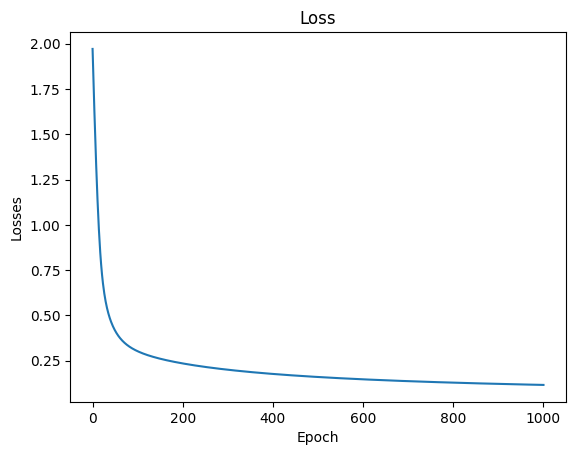

In [136]:
start_train = time.time()
model = SoftmaxRegression(n_features, n_classes, lr=0.1, epoch_max=1001)
model.fit(x_train, y_train)
accuracy = model.test(x_train, y_train)
end_train = time.time()

print(f"=> Accuracy: {accuracy:.4f}")
model.plot_loss()

In [135]:
start_test = time.time()
accuracy = model.test(x_test, y_test)
end_test = time.time()

print(f"=> Accuracy: {accuracy:.4f}")
print(f"- Training time: {end_train - start_train:.3f} (s)")
print(f"- Testing time: {end_test - start_test:.3f} (s)")

=> Accuracy: 1.0000
- Training time: 0.138 (s)
- Testing time: 0.000 (s)
